In [1]:
#!pip install TCT

from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np

In [2]:
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
    # Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
    # Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
    # Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



53
(10580, 5)
(21999, 5)


In [10]:
url = 'https://amlkg.systemsbiology.org:9990/AMLkg/meta_knowledge_graph'
response = requests.get(url)
data = response.json()
for i in range(len(data["edges"])):
    APInames, metaKG = translator_metakg.add_new_API_for_query(APInames, metaKG, "AMLKG", "https://amlkg.systemsbiology.org:9990/AMLkg/query", data["edges"][i]['predicate'], data["edges"][i]['subject'], data["edges"][i]['object'])


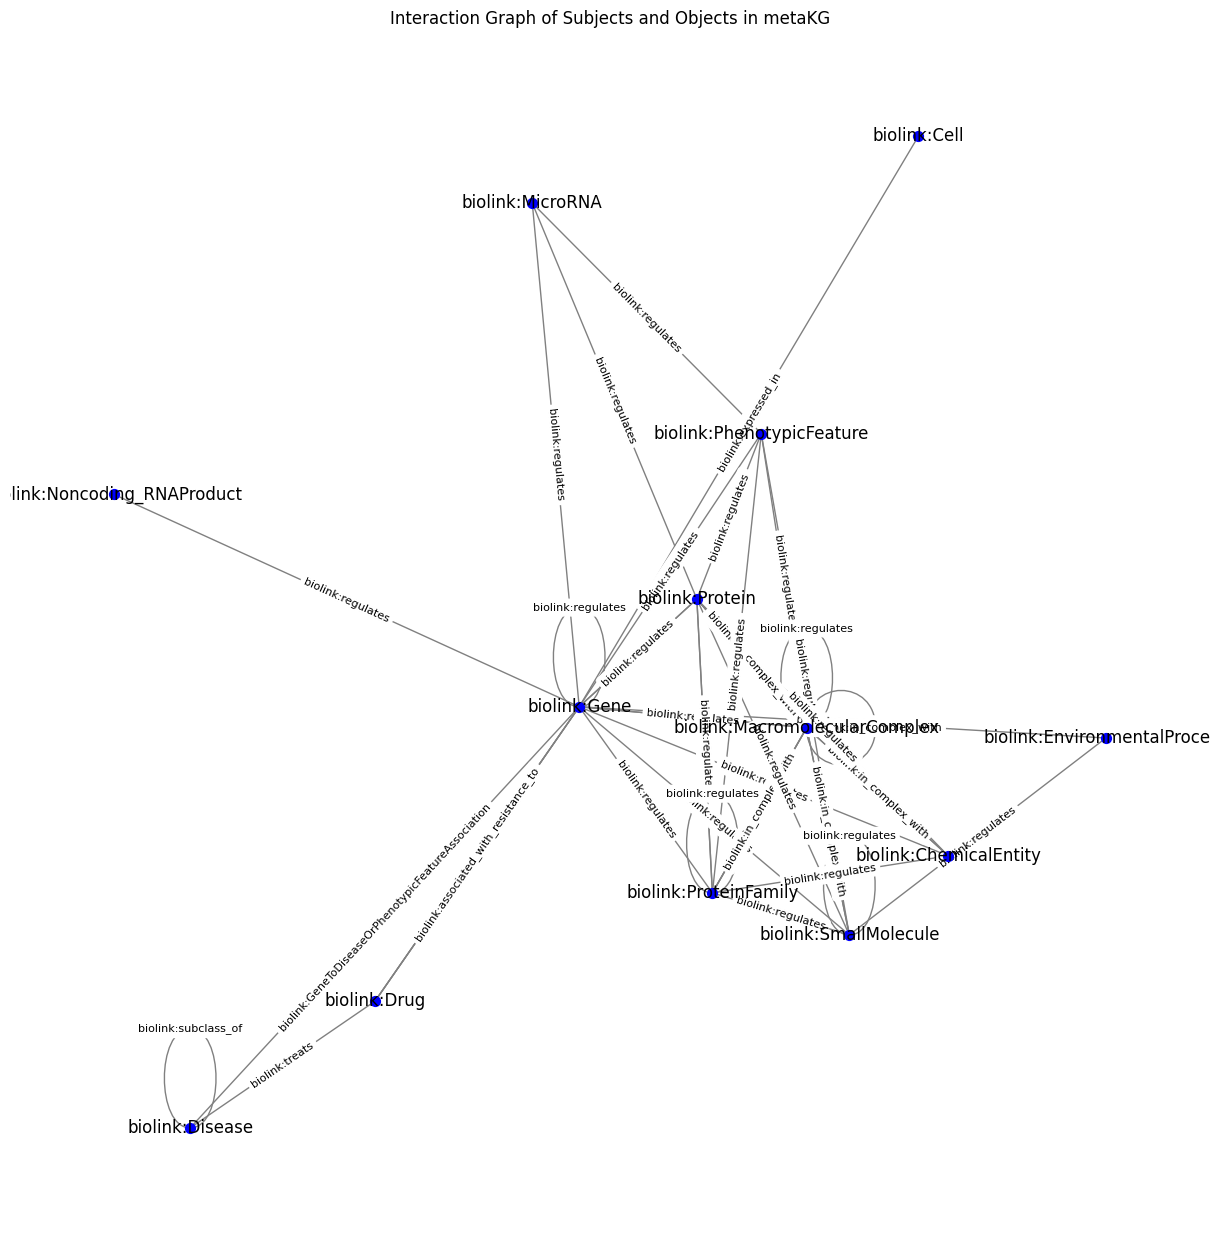

In [11]:
import networkx as nx
selected_KGs = ['AMLKG']

metaKG_sele = metaKG[metaKG['API'].isin(selected_KGs)]

# build a multigraph to capture all edges (including duplicates) and their predicates
G = nx.MultiGraph()
for _, row in metaKG_sele.iterrows():
        G.add_edge(row['Subject'], row['Object'], predicate=row['Predicate'])

# layout and draw nodes + edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos,
                with_labels=True,
                node_size=50,
                font_size=12,
                font_color='black',
                node_color='blue',
                edge_color='gray')

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()

In [12]:
metaKG_sele

,API,Predicate,Subject,Object,URL
21999,AMLKG,biolink:expressed_in,biolink:Gene,biolink:Cell,https://amlkg.systemsbiology.org:9990/AMLkg/query
22000,AMLKG,biolink:regulates,biolink:Gene,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22001,AMLKG,biolink:regulates,biolink:MacromolecularComplex,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22002,AMLKG,biolink:regulates,biolink:MacromolecularComplex,biolink:PhenotypicFeature,https://amlkg.systemsbiology.org:9990/AMLkg/query
22003,AMLKG,biolink:regulates,biolink:ChemicalEntity,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22004,AMLKG,biolink:regulates,biolink:Protein,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22005,AMLKG,biolink:regulates,biolink:Gene,biolink:MacromolecularComplex,https://amlkg.systemsbiology.org:9990/AMLkg/query
22006,AMLKG,biolink:regulates,biolink:SmallMolecule,biolink:Gene,https://amlkg.systemsbiology.org:9990/AMLkg/query
22007,AMLKG,biolink:regulates,biolink:SmallMolecule,biolink:SmallMolecule,https://amlkg.systemsbiology.org:9990/AMLkg/query
22008,AMLKG,biolink:regulates,biolink:SmallMolecule,biolink:ProteinFamily,https://amlkg.systemsbiology.org:9990/AMLkg/query


In [13]:
APInames

{'BioThings Explorer (BTE) TRAPI': 'https://bte.transltr.io/v1/query/',
 'MolePro': 'https://molepro-trapi.transltr.io/molepro/trapi/v1.5/query/',
 'Gene-List Network Enrichment Analysis': 'https://translator.broadinstitute.org/gelinea-trapi/v1.5/query/',
 'Multiomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/multiomics/query',
 'Microbiome KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/mbkp/query',
 'Text Mined Cooccurrence API': 'https://cooccurrence.transltr.io/query/',
 'ARAX Translator Reasoner - TRAPI 1.5.0': 'https://arax.transltr.io/api/arax/v1.4/query/',
 'RTX KG2 - TRAPI 1.5.0': 'https://kg2cploverdb.ci.transltr.io/kg2c/query',
 'CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/BigGIM_DrugResponse_PerformancePhase/query',
 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/dakp/query',
 'Genetics Data Provider for NCATS Biomedical Translator Reasoners': 'https://genetics-kp.transltr.io/genetics_provid

In [17]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('AML',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = APInames,
                                                                                            #APInames = {'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/ctkp/query'},
                                                                                            metaKG = metaKG,
                                                                                            API_predicates = API_predicates)    

MONDO:0018874
'AMLKG' generated an exception: 'AMLKG'
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hmdb(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-reactome(Trapi v1.5.0)' generated an exception: argument

NodeNorm does not know about these identifiers: UNII:IZR558KO53,UNII:L4D9X59F34,UNII:OEN4982XNW,UNII:RXG7T6RB8K,UNII:3FXW1IW7WT,UNII:E6349B696W,UNII:PVH8394DLN,UNII:FR89SC8CT4,UNII:3D2KVS9K7P,UNII:O5V0F26RUW,UNII:VS12X225PL,UNII:Q805XO2F7C,UNII:Y8DGL9885E,UNII:ET4JC4S66E,UNII:475247QF1Z
[Text(0.5, 0, 'GTI-2040'), Text(2.5, 0, 'IMGN-779'), Text(4.5, 0, 'Vadastuximab talirine'), Text(6.5, 0, 'Milademetan tosylate'), Text(8.5, 0, 'Flumatinib'), Text(10.5, 0, 'HUMAN IL-15'), Text(12.5, 0, 'Emvododstat'), Text(14.5, 0, 'Edetic acid'), Text(16.5, 0, 'Trametinib'), Text(18.5, 0, 'Brequinar'), Text(20.5, 0, 'Pegaspargase'), Text(22.5, 0, 'Arsenic Trioxide'), Text(24.5, 0, 'UNII:IZR558KO53'), Text(26.5, 0, 'Alpelisib'), Text(28.5, 0, 'Lintuzumab'), Text(30.5, 0, 'Calaspargase pegol'), Text(32.5, 0, 'Sitagliptin'), Text(34.5, 0, 'Rimiducid'), Text(36.5, 0, 'Polyethylene Glycol 6000'), Text(38.5, 0, 'Sulfasalazine'), Text(40.5, 0, 'Antroquinonol'), Text(42.5, 0, 'Dexrazoxane'), Text(44.5, 0, 'key

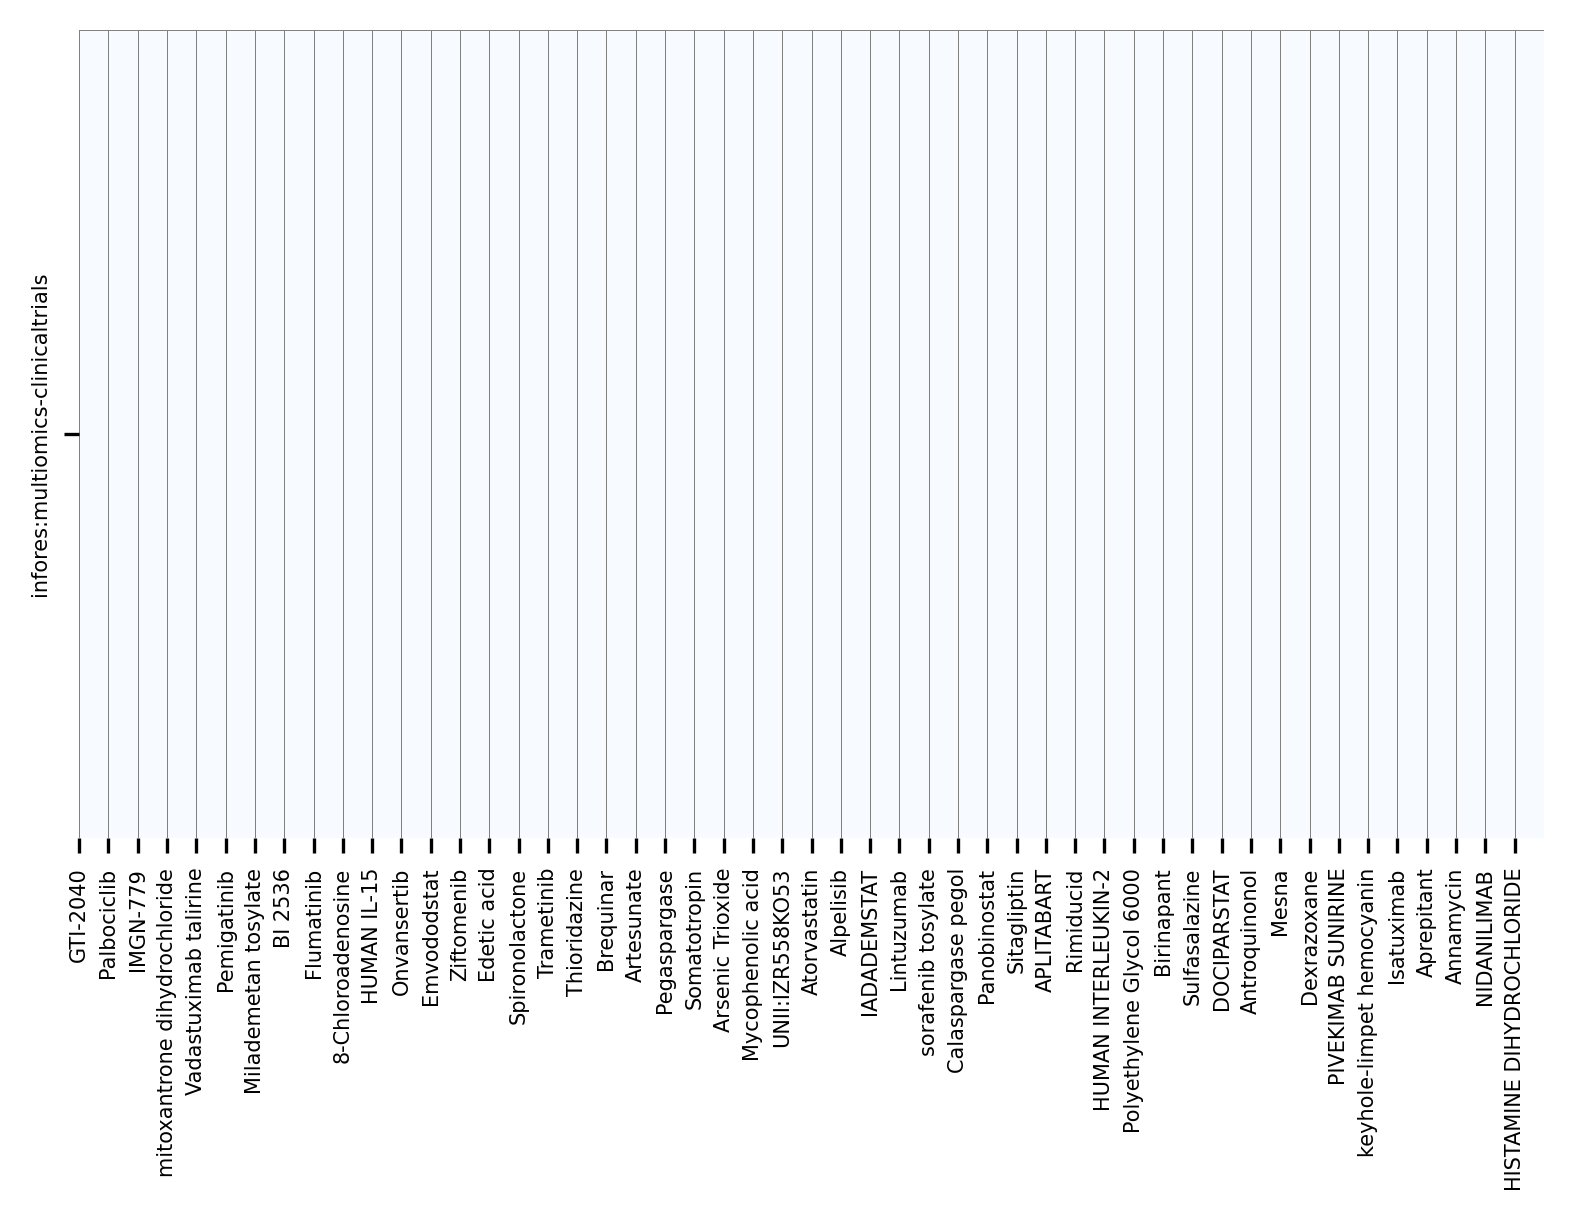

[Text(0.5, 0, 'GTI-2040'), Text(2.5, 0, 'IMGN-779'), Text(4.5, 0, 'Vadastuximab talirine'), Text(6.5, 0, 'Milademetan tosylate'), Text(8.5, 0, 'Flumatinib'), Text(10.5, 0, 'HUMAN IL-15'), Text(12.5, 0, 'Emvododstat'), Text(14.5, 0, 'Edetic acid'), Text(16.5, 0, 'Trametinib'), Text(18.5, 0, 'Brequinar'), Text(20.5, 0, 'Pegaspargase'), Text(22.5, 0, 'Arsenic Trioxide'), Text(24.5, 0, 'UNII:IZR558KO53'), Text(26.5, 0, 'Alpelisib'), Text(28.5, 0, 'Lintuzumab'), Text(30.5, 0, 'Calaspargase pegol'), Text(32.5, 0, 'Sitagliptin'), Text(34.5, 0, 'Rimiducid'), Text(36.5, 0, 'Polyethylene Glycol 6000'), Text(38.5, 0, 'Sulfasalazine'), Text(40.5, 0, 'Antroquinonol'), Text(42.5, 0, 'Dexrazoxane'), Text(44.5, 0, 'keyhole-limpet hemocyanin'), Text(46.5, 0, 'Aprepitant'), Text(48.5, 0, 'NIDANILIMAB')]


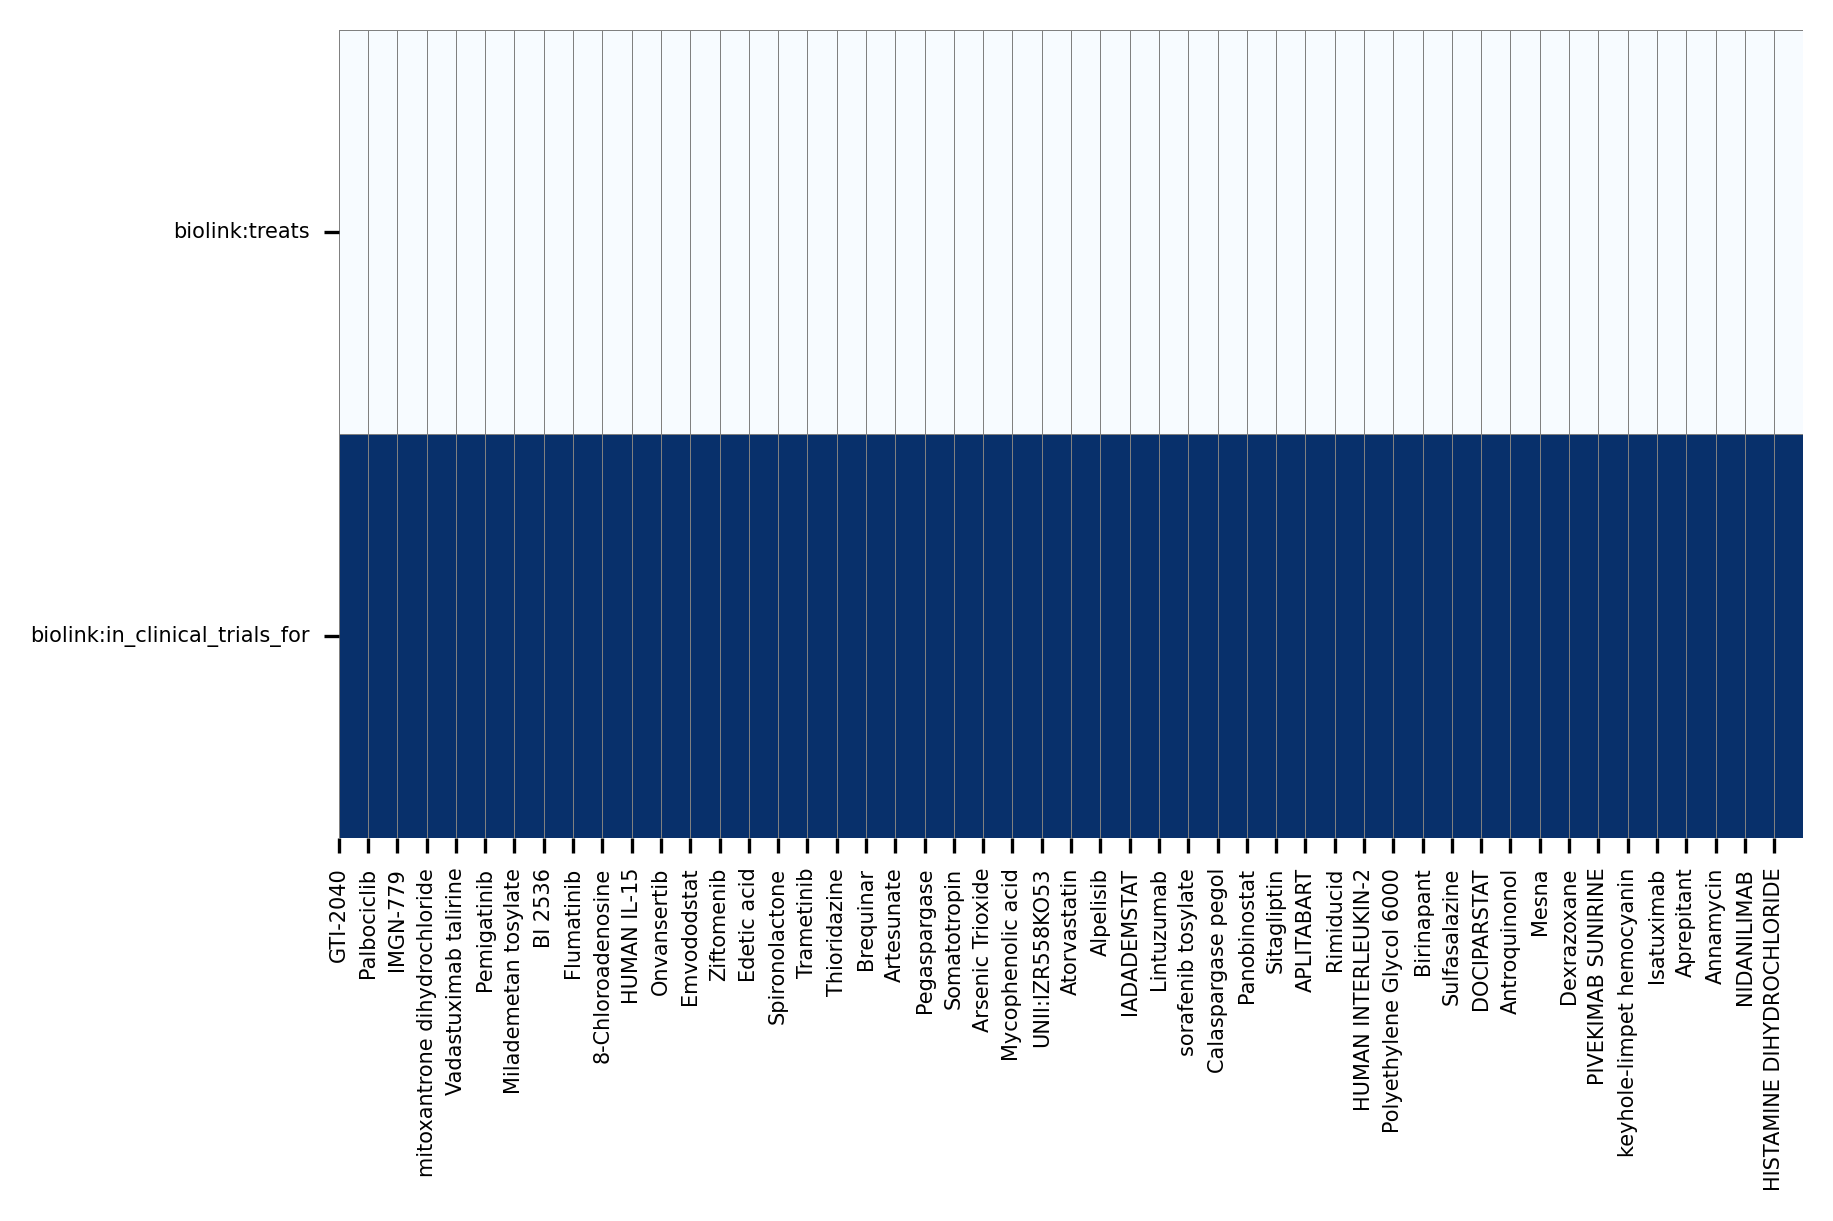

,GTI-2040,Palbociclib,IMGN-779,mitoxantrone dihydrochloride,Vadastuximab talirine,Pemigatinib,Milademetan tosylate,BI 2536,Flumatinib,8-Chloroadenosine,...,CUSATUZUMAB,UNII:475247QF1Z,Oxygen,CLUSTER OF DIFFERENTIATION 8.ALPHA.,LEMZOPARLIMAB,Pinometostat,SGN-CD123A,Volasertib,Cobicistat,Lomustine
biolink:treats,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:in_clinical_trials_for,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

MONDO:0018874
NCBIGene:7157
'AMLKG' generated an exception: 'AMLKG'
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Automat-reactome(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-hmdb(Trapi v1.5.0)' ge

/Users/guangrong/Documents/GitHub_project/TCT/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


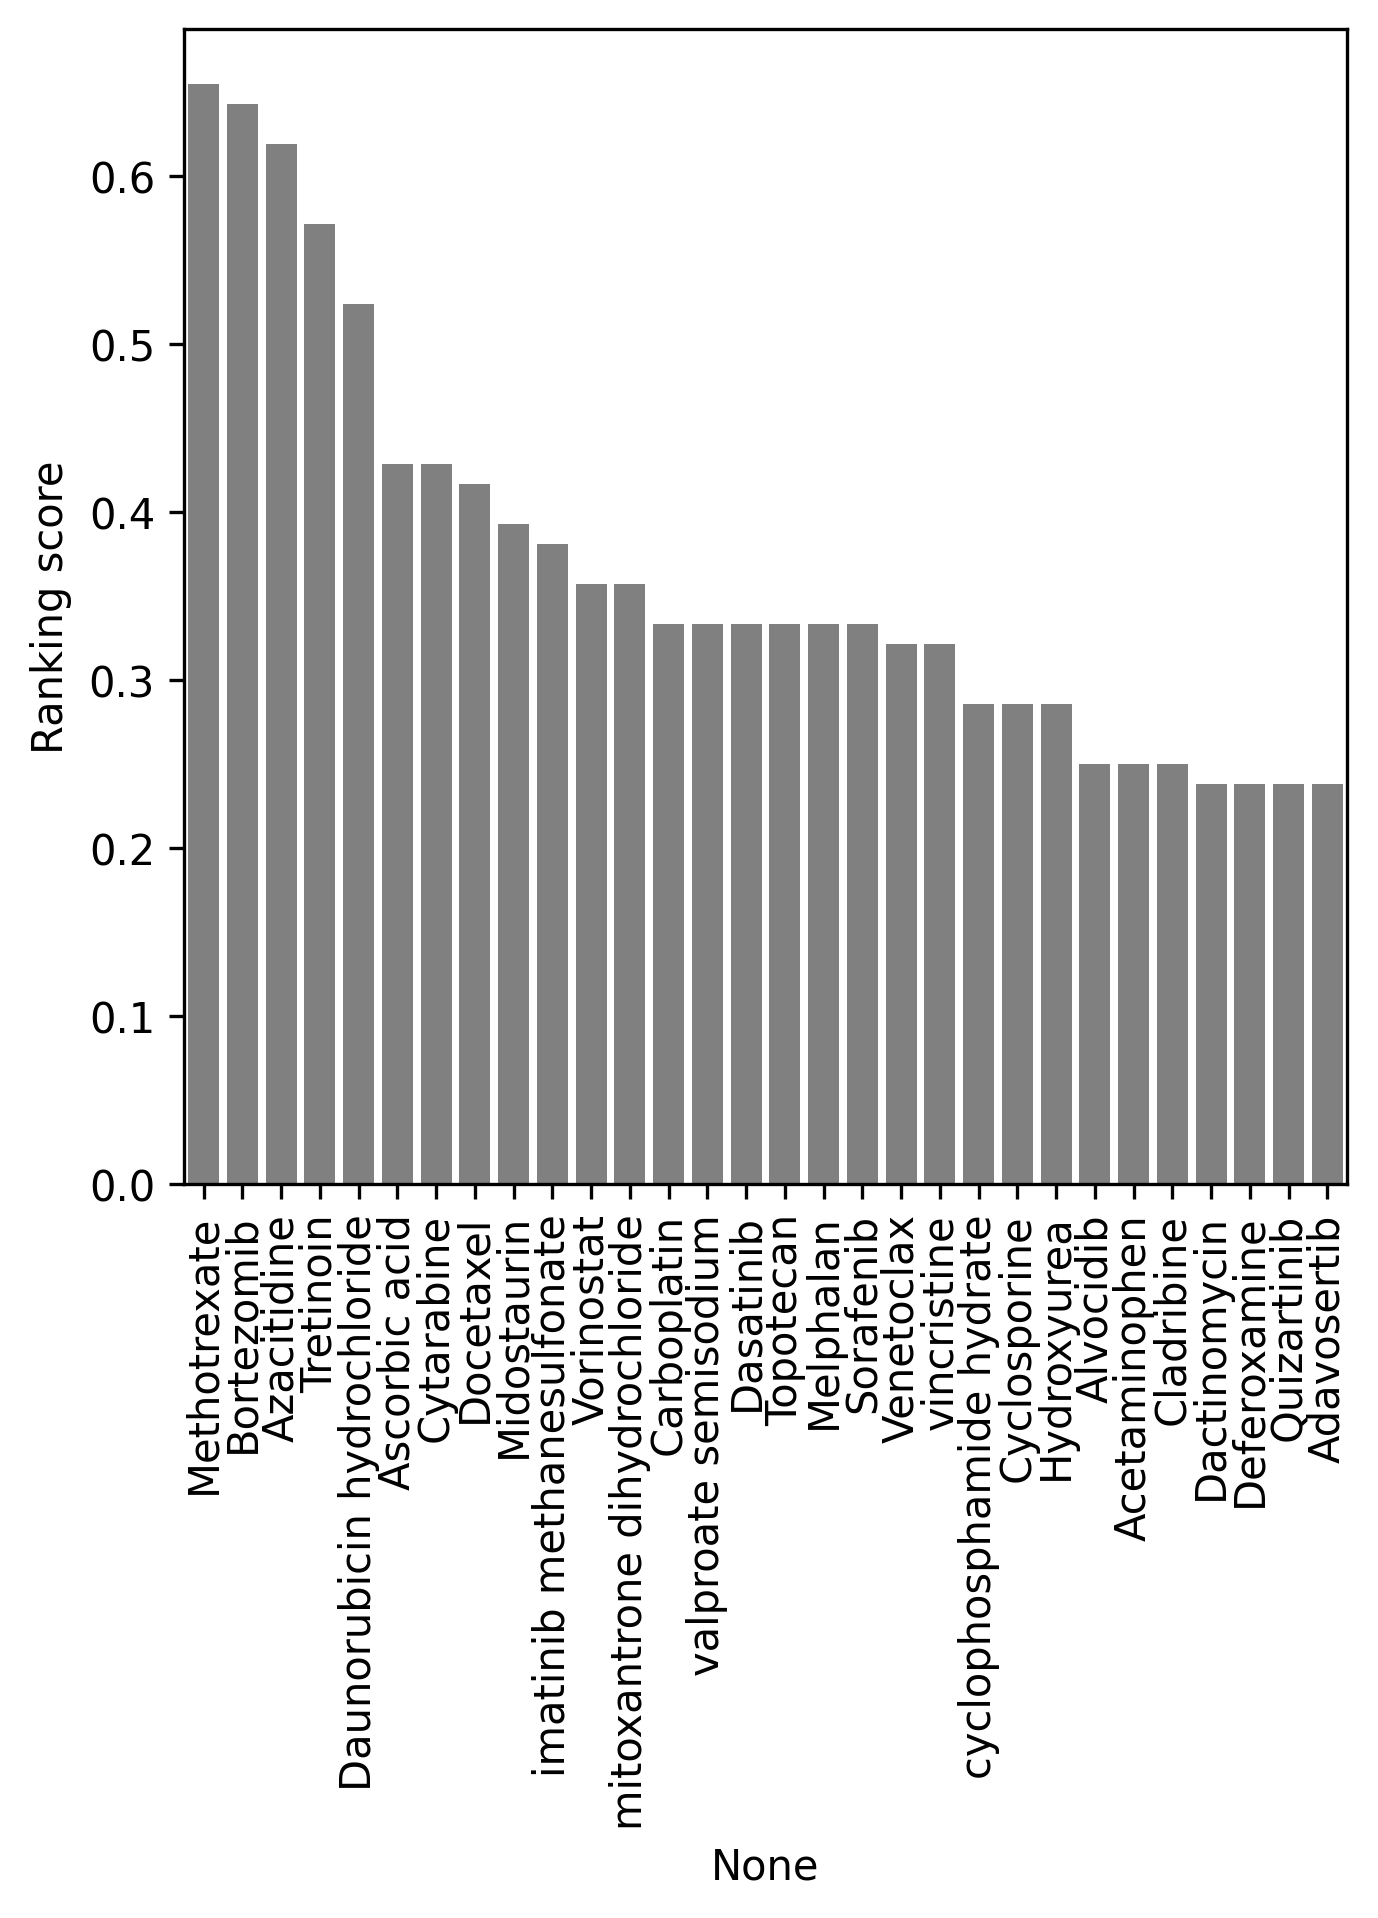

In [20]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('AML', 
                                                                                                                                                                                'TP53', 
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'], 
                                                                                                                                                                                APInames=APInames, 
                                                                                                                                                                                metaKG=metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [28]:
paths.head(20)

,score,output_node,predictes1,predictes2,output_node_name
Methotrexate,0.654762,CHEBI:44185,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:affe...,Methotrexate
Bortezomib,0.642857,CHEBI:52717,biolink:in_clinical_trials_for; biolink:relate...,biolink:interacts_with; biolink:affects; bioli...,Bortezomib
Azacitidine,0.619048,CHEBI:2038,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Azacitidine
Tretinoin,0.571429,CHEBI:15367,biolink:in_clinical_trials_for; biolink:relate...,biolink:interacts_with; biolink:affects; bioli...,Tretinoin
Daunorubicin hydrochloride,0.523810,CHEBI:31456,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Daunorubicin hydrochloride
Ascorbic acid,0.428571,CHEBI:22652,biolink:in_clinical_trials_for; biolink:has_ad...,biolink:affects; biolink:affects; biolink:rela...,Ascorbic acid
Cytarabine,0.428571,CHEBI:28680,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Cytarabine
Docetaxel,0.416667,CHEBI:4672,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:affects; biolink:rela...,Docetaxel
Midostaurin,0.392857,CHEBI:63452,biolink:in_clinical_trials_for; biolink:relate...,biolink:affects; biolink:related_to; biolink:a...,Midostaurin
imatinib methanesulfonate,0.380952,CHEBI:31690,biolink:in_clinical_trials_for; biolink:positi...,biolink:affects; biolink:related_to; biolink:o...,imatinib methanesulfonate


In [26]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Bortezomib').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…